# Project
## Column Labels
Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings

In [159]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [63]:
# Import data
with open('constituents-financials_csv.csv') as cfile:
    line = cfile.readline()
    print(line)
labels = 'Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings'
labels = labels.split(',')
print(labels[4:13])

MMM,3M Company,Industrials,222.89,24.31,2.3328617,7.92,259.77,175.49,138721055226,9048000000,4.3902707,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=MMM

['Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']


# Choose some features
Dividend Yield, Earnings/Share, 52-Week Low, 52 Week High, Market Cap, EBITDA

In [180]:
def pickfeatures(inds, data):
    filtered = []
    prices = []
    for i, line in enumerate(data):
        point = []
        if '' in line:
            continue
        for idx in inds:
            try:
                point.append(float(line[idx]))
            except:
                print(i, line[idx])
        
        try:
            prices.append(float(line[3]))
            filtered.append(point)
        except:
            print(i, line[3])
    return filtered, prices        

with open('constituents-financials_csv.csv') as cfile:
    lines = cfile.readlines()
    lines = [line.strip().split(',') for line in lines]
# print(lines[:5])
print(len(lines))
data, prices = pickfeatures([4, 5, 6, 7, 8, 9, 10, 11, 12], lines)
print(len(data))
print(data[:5])
print(len(prices))

505
495
[[24.31, 2.3328617, 7.92, 259.77, 175.49, 138721055226.0, 9048000000.0, 4.3902707, 11.34], [27.76, 1.1479592, 1.7, 68.39, 48.925, 10783419933.0, 601000000.0, 3.5754826, 6.35], [22.51, 1.9089824, 0.26, 64.6, 42.28, 102121042306.0, 5744000000.0, 3.7404804, 3.19], [19.41, 2.4995599, 3.29, 125.86, 60.05, 181386347059.0, 10310000000.0, 6.291571, 26.14], [25.47, 1.7144699, 5.44, 162.6, 114.82, 98765855553.0, 5643228000.0, 2.604117, 10.62]]
495


505


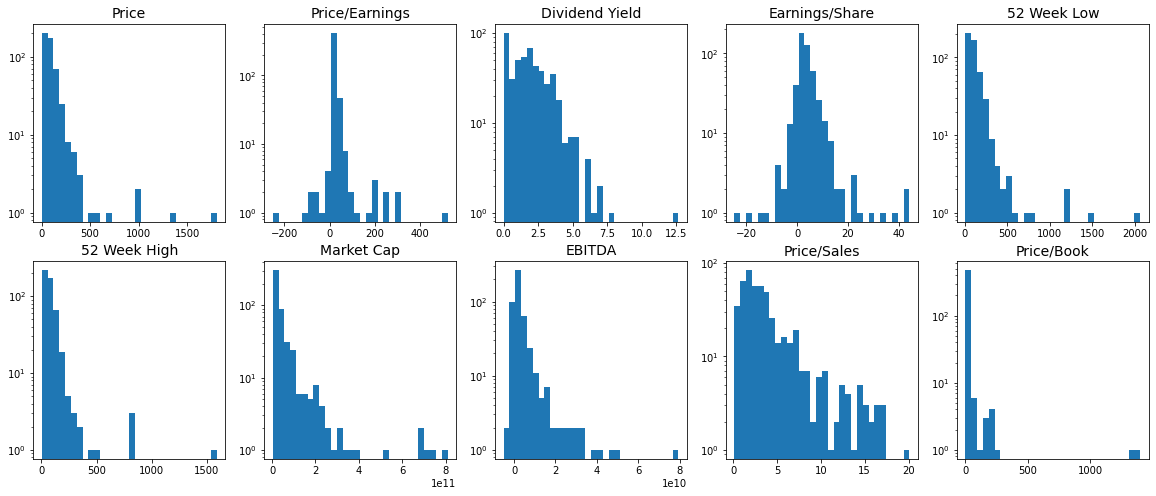

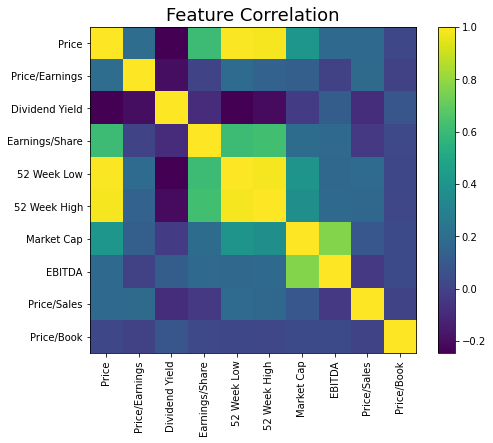

In [121]:
# Plot feature distributions and correlations
with open('constituents-financials_csv.csv') as cfile:
    lines = cfile.readlines()
    lines = [line.strip().split(',') for line in lines]
# print(lines[:5])
print(len(lines))
data, prices = pickfeatures([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], lines)

data = np.array(data)
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
    ax[int(i/5), i%5].hist(data[:, i], bins=30)
    ax[int(i/5), i%5].set_title(labels[3:13][i], fontsize=14)
    ax[int(i/5), i%5].set_yscale('log')
plt.show()

corr = np.corrcoef(data.T)
plt.figure(figsize=(8,6))
plt.imshow(corr)
plt.colorbar()
plt.title("Feature Correlation", fontsize=18)
plt.xticks(np.arange(10), labels=labels[3:13], rotation='vertical')
plt.yticks(np.arange(10), labels=labels[3:13])
plt.show()

505


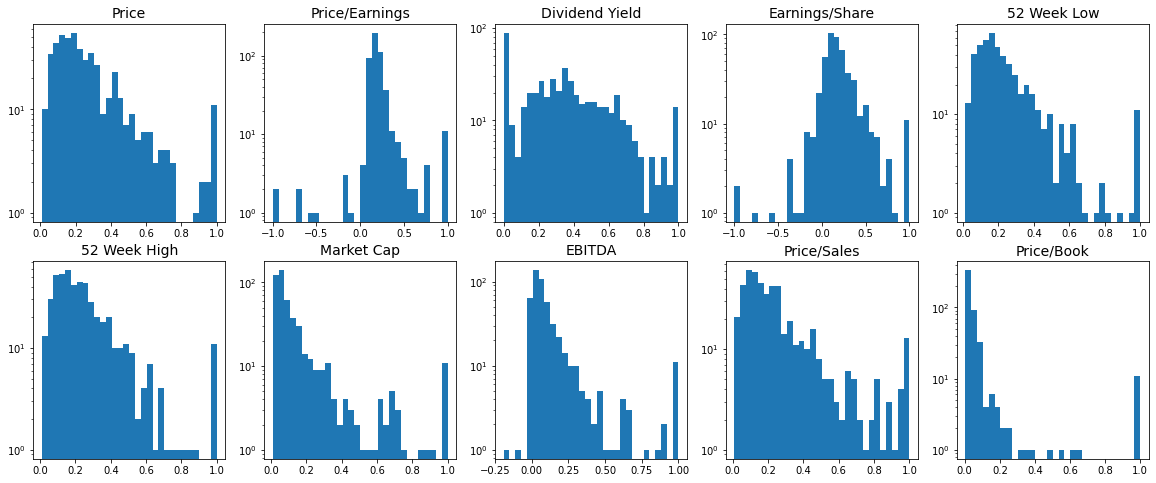

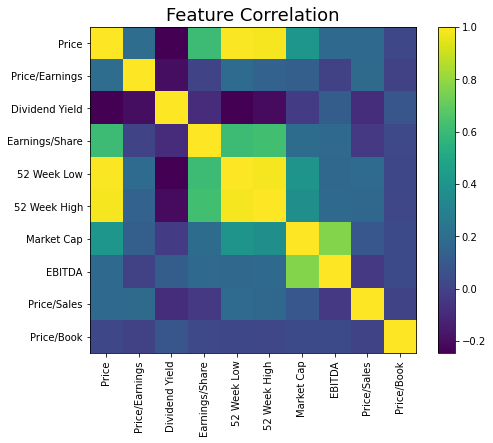

In [120]:
# normalize data based on high (90+) percentile level to exclude outlier
with open('constituents-financials_csv.csv') as cfile:
    lines = cfile.readlines()
    lines = [line.strip().split(',') for line in lines]
# print(lines[:5])
print(len(lines))
data, prices = pickfeatures([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], lines)

data = np.array(data)
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
    ax[int(i/5), i%5].hist(np.clip(data[:, i]/np.percentile(data[:, i], 98), a_min=-1, a_max=1), bins=30)
    ax[int(i/5), i%5].set_title(labels[3:13][i], fontsize=14)
    ax[int(i/5), i%5].set_yscale('log')
plt.show()

corr = np.corrcoef(data.T)
plt.figure(figsize=(8,6))
plt.imshow(corr)
plt.colorbar()
plt.title("Feature Correlation", fontsize=18)
plt.xticks(np.arange(10), labels=labels[3:13], rotation='vertical')
plt.yticks(np.arange(10), labels=labels[3:13])
plt.show()

505


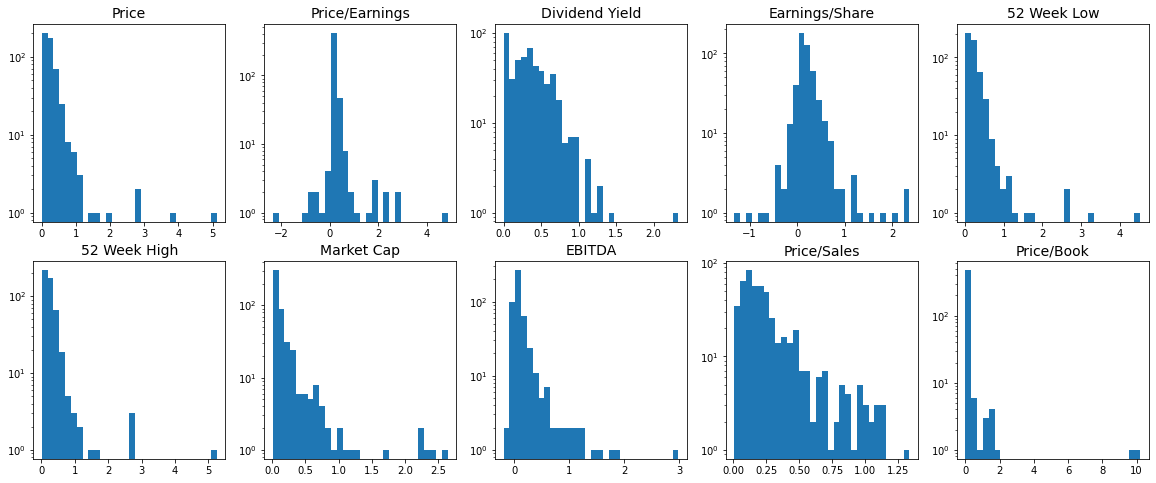

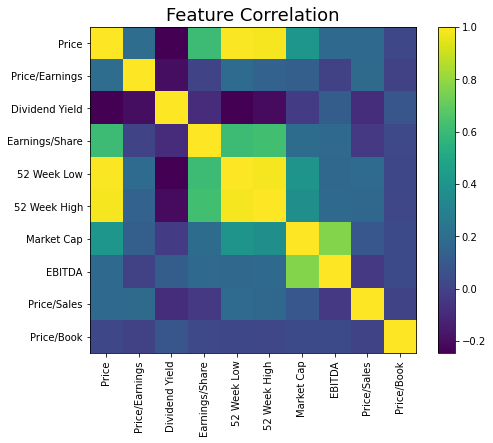

In [137]:
# normalize data based on high (90+) percentile level to exclude outlier
with open('constituents-financials_csv.csv') as cfile:
    lines = cfile.readlines()
    lines = [line.strip().split(',') for line in lines]
# print(lines[:5])
print(len(lines))
data, prices = pickfeatures([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], lines)

data = np.array(data)
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
    ax[int(i/5), i%5].hist(data[:, i]/np.percentile(data[:, i], 98), bins=30)
    ax[int(i/5), i%5].set_title(labels[3:13][i], fontsize=14)
    ax[int(i/5), i%5].set_yscale('log')
plt.show()

corr = np.corrcoef(data.T)
plt.figure(figsize=(8,6))
plt.imshow(corr)
plt.colorbar()
plt.title("Feature Correlation", fontsize=18)
plt.xticks(np.arange(10), labels=labels[3:13], rotation='vertical')
plt.yticks(np.arange(10), labels=labels[3:13])
plt.show()

# Create FC Model

In [155]:
# Create Model
class FC_price(torch.nn.Module):
	def __init__(self, n_features):
		super(FC_price, self).__init__()
		hidden1 = 50
		hidden2 = 20

		self.FC1 = nn.Linear(n_features, hidden1)
		self.FC2 = nn.Linear(hidden1, hidden2)
		self.FC3 = nn.Linear(hidden2, 1)

	def forward(self, x):
		x = self.FC1(x)
		x = torch.relu(x)
		x = self.FC2(x)
		x = torch.relu(x)
		x = self.FC3(x)
		return x

fcprice = FC_price(10)
print('# of Parameters:', sum([param.numel() for param in fcprice.parameters()]))


# of Parameters: 1591


100%|██████████| 30/30 [00:10<00:00,  2.78it/s]


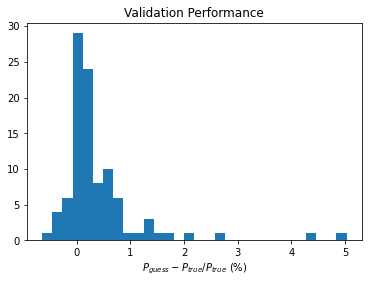

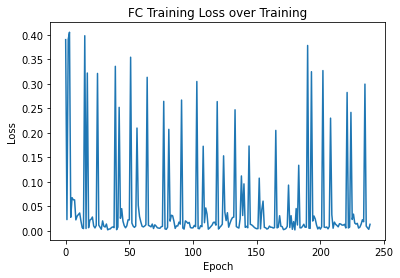

In [189]:
class finDataset(Dataset):
    def __init__(self):
        with open('constituents-financials_csv.csv') as cfile:
            lines = cfile.readlines()
            lines = [line.strip().split(',') for line in lines]
        data, prices = pickfeatures([4, 5, 6, 7, 8, 9, 10, 11, 12], lines)
        data = np.array(data)
        
        # Scale and clip input data based on 98 percentile cut
        self.trainX = []
        for i in range(len(data[0])):
            self.trainX.append(np.clip(data[:, i]/np.percentile(data[:, i], 98), a_min=-1, a_max=1))
        self.trainX = np.array(self.trainX).T
        
        # Scale target prices, but don't clip
        prices = np.array(prices)
        self.trainY = prices/np.percentile(prices, 98)

    def __len__(self):
        return len(self.trainX)

    def __getitem__(self, idx):
        return self.trainX[idx], self.trainY[idx]

findata = finDataset()

# split data into train and validation randomly
validation_split = .2
dataset_size = len(findata)
val_size = int(dataset_size*validation_split)
indices = list(range(dataset_size))

train_indices, val_indices = indices[val_size:], indices[:val_size]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(findata, batch_size=50, sampler=train_sampler)
val_loader = DataLoader(findata, batch_size=50, sampler=valid_sampler)
NUM_EPOCHS = 30
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

mse = torch.nn.MSELoss().to(DEVICE)

fcprice = FC_price(9).to(DEVICE)

optimizer = optim.Adam(fcprice.parameters(), lr=0.05)

losses = []

for epoch in tqdm(range(NUM_EPOCHS)):
    for i, (feats, prices) in enumerate(train_loader):
        fcprice.train()
        feats = feats.to(DEVICE).float()
        prices = prices.view(-1, 1)
        prices = prices.to(DEVICE).float()

        outputs = fcprice(feats)
        loss = mse(outputs, prices).float()
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    outputs = np.array([])
    targets = np.array([])
    for i, (feats, prices) in enumerate(val_loader):
        with torch.no_grad():
            fcprice.eval()
            feats = feats.to(DEVICE).float()
            prices = prices.view(-1, 1)
            prices = prices.to(DEVICE).float()
            
            target_i = np.array(prices).flatten()
            output_i = fcprice(feats)
            output_i = np.array(output_i).flatten()
            outputs = np.concatenate((outputs, output_i))
            targets = np.concatenate((targets, target_i))
    errs = (outputs-targets)/targets
    # print('Average Error', np.mean(errs))
    # plt.figure()
    plt.hist(errs, bins=30)
    plt.title('Validation Performance')
    plt.xlabel('$P_{guess}-P_{true}/P_{true}$ (%)')
    plt.savefig('ErrorHists/9feats_valresolution/'+str(epoch)+'_priceerror.png', dpi=300)
    plt.close()
    # plt.show()

plt.figure()
plt.hist(errs, bins=30)
plt.title('Validation Performance')
plt.xlabel('$P_{guess}-P_{true}/P_{true}$ (%)')
plt.show()

plt.figure()
plt.plot(losses)
plt.title('FC Training Loss over Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


## Check if the model is relying on 52wk price data
Remove 52 wk price data from the dataset, reducing input features to 7

100%|██████████| 30/30 [00:09<00:00,  3.10it/s]


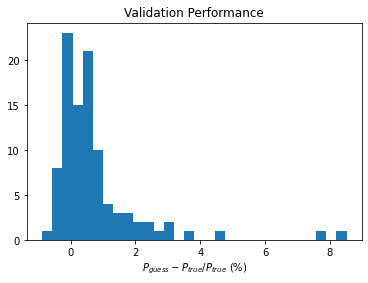

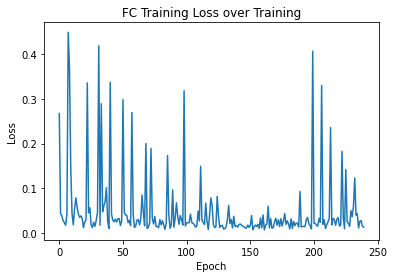

In [187]:
class finDataset(Dataset):
    def __init__(self):
        with open('constituents-financials_csv.csv') as cfile:
            lines = cfile.readlines()
            lines = [line.strip().split(',') for line in lines]
        data, prices = pickfeatures([4, 5, 6, 9, 10, 11, 12], lines)
        data = np.array(data)
        
        # Scale and clip input data based on 98 percentile cut
        self.trainX = []
        for i in range(len(data[0])):
            self.trainX.append(np.clip(data[:, i]/np.percentile(data[:, i], 98), a_min=-1, a_max=1))
        self.trainX = np.array(self.trainX).T
        
        # Scale target prices, but don't clip
        prices = np.array(prices)
        self.trainY = prices/np.percentile(prices, 98)

    def __len__(self):
        return len(self.trainX)

    def __getitem__(self, idx):
        return self.trainX[idx], self.trainY[idx]

findata = finDataset()

# split data into train and validation randomly
validation_split = .2
dataset_size = len(findata)
val_size = int(dataset_size*validation_split)
indices = list(range(dataset_size))

train_indices, val_indices = indices[val_size:], indices[:val_size]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(findata, batch_size=50, sampler=train_sampler)
val_loader = DataLoader(findata, batch_size=50, sampler=valid_sampler)


NUM_EPOCHS = 30
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

mse = torch.nn.MSELoss().to(DEVICE)

# FC Network with N inputs
fcprice = FC_price(7).to(DEVICE)

optimizer = optim.Adam(fcprice.parameters(), lr=0.05)

losses = []

for epoch in tqdm(range(NUM_EPOCHS)):
    for i, (feats, prices) in enumerate(train_loader):
        fcprice.train()
        feats = feats.to(DEVICE).float()
        prices = prices.view(-1, 1)
        prices = prices.to(DEVICE).float()

        outputs = fcprice(feats)
        loss = mse(outputs, prices).float()
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    outputs = np.array([])
    targets = np.array([])
    for i, (feats, prices) in enumerate(val_loader):
        with torch.no_grad():
            fcprice.eval()
            feats = feats.to(DEVICE).float()
            prices = prices.view(-1, 1)
            prices = prices.to(DEVICE).float()
            
            target_i = np.array(prices).flatten()
            output_i = fcprice(feats)
            output_i = np.array(output_i).flatten()
            outputs = np.concatenate((outputs, output_i))
            targets = np.concatenate((targets, target_i))
    errs = (outputs-targets)/targets
    # print('Average Error', np.mean(errs))
    # plt.figure()
    plt.hist(errs, bins=30)
    plt.title('Validation Performance')
    plt.xlabel('$P_{guess}-P_{true}/P_{true}$ (%)')
    plt.savefig('ErrorHists/no52wk_valresolution/'+str(epoch)+'_priceerror.png', dpi=300)
    plt.close()
    # plt.show()

plt.figure()
plt.hist(errs, bins=30)
plt.title('Validation Performance')
plt.xlabel('$P_{guess}-P_{true}/P_{true}$ (%)')
plt.show()

plt.figure()
plt.plot(losses)
plt.title('FC Training Loss over Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [186]:
print(next(iter(train_loader))[0][0])
print(val_size)

tensor([0.2480, 0.0000, 0.0102, 0.0524, 0.0292, 0.4642, 0.0448],
       dtype=torch.float64)
99
